## FEATURES DESCRIPTION :

***work_year:*** The year in which the salary was paid.

***experience_level:*** The job's experience level during that year, ***categorized as:*** EN (Entry-level/Junior), MI (Mid-level/Intermediate), SE (Senior-level/Expert), EX (Executive-level/Director).

***employment_type***: The type of employment, which could be: PT (Part-time), FT (Full-time), CT (Contract), FL (Freelance).

***job_title:*** The position held during that year.

***salary:*** The gross salary paid.

***salary_currency:*** The currency in which the salary was paid, given as an ISO 4217 currency code.

***salary_in_usd:*** The salary converted to USD, based on the average exchange rate for that year.

***employee_residence:*** The employee's primary residence, represented by an ISO 3166 country code.
remote_ratio: The percentage of work done remotely, classified as: 0 (less than 20% remote), 50 (partially remote), 100 (more than 80% remote).

***company_location:*** The country where the employer’s main office or contracting branch is located, represented by an ISO 3166 country code.

***company_size:*** The average company size based on the number of employees: S (small, fewer than 50), M (medium, 50-250), L (large, more than 250).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.model_selection import cross_val_score

In [ ]:
# To check if drive mounted successfully :
!ls /content/drive/MyDrive/

 AparnaSharma_PR.pdf   AparnaSharma_Task1  'Colab Notebooks'   ds_salaries.csv	'ML files'


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aparnasharma10010","key":"03d9c4d5cbaad58e6ba90c0e5997dfb5"}'}

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
datascience = pd.read_csv('/content/drive/MyDrive/ML files/ds_salaries.csv')

In [ ]:
datascience.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [ ]:
datascience.tail(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [ ]:
# statistical summary of numerical columns:
datascience.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
# statistical summary of Categorical columns:
datascience.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,2584,2584,2584,2584,2584,2584,2584
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,1554,2547,598,2107,1893,1929,2028


In [ ]:
datascience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
datascience.shape

(3755, 11)

In [ ]:
datascience.size

41305

In [ ]:
datascience.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
datascience.duplicated().sum()

1171

In [ ]:
datascience.drop_duplicates(inplace=True)

In [ ]:
datascience.duplicated().sum()

0

In [ ]:
datascience['employment_type'].nunique()

4

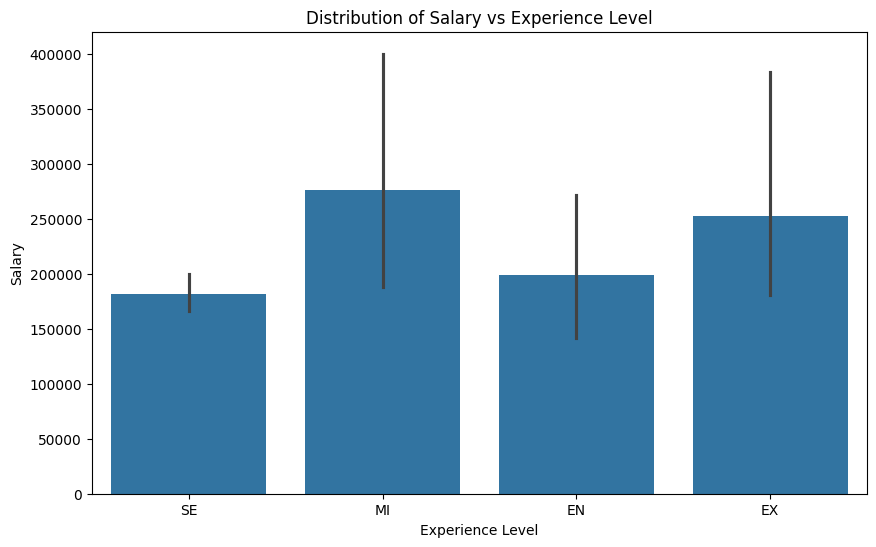

In [ ]:
# Distribution of Salary vs Experience Level
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary', data=datascience)
plt.title('Distribution of Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

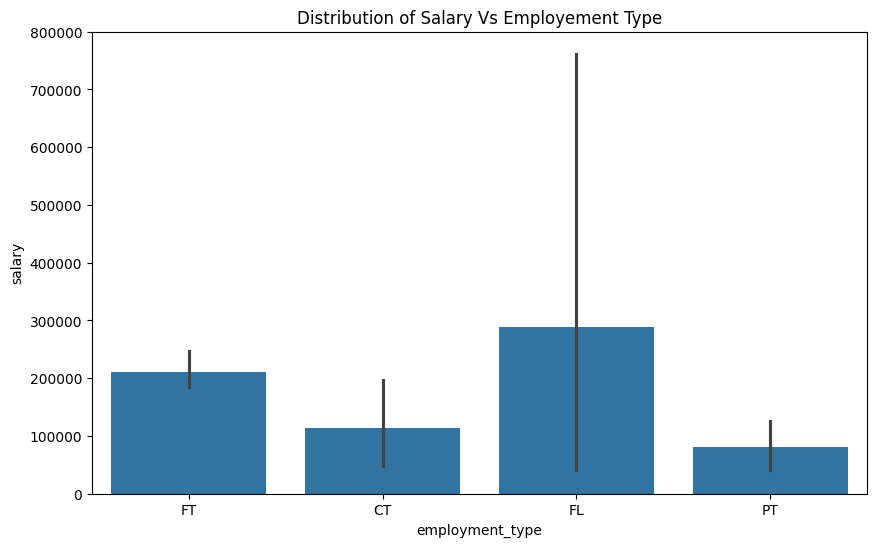

In [ ]:
# Distribution of Salary vs Employement Type
plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary', data=datascience)
plt.title("Distribution of Salary Vs Employement Type")
plt.show()

In [ ]:
datascience['work_year'].nunique()

4

In [ ]:
datascience['work_year'].value_counts()

,count
work_year,
2023,1156
2022,1125
2021,228
2020,75


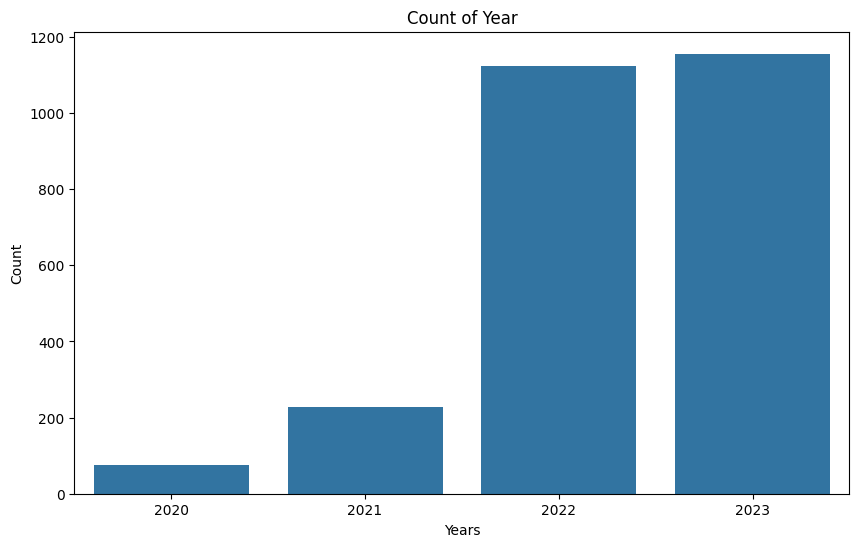

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=datascience['work_year'])
plt.title('Count of Year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.regplot(x='salary', y='salary_in_usd', data=datascience)
plt.title('Salary vs Salary in USD')
plt.xlabel('Salary')
plt.ylabel('Salary in USD')
plt.show()

In [ ]:
numerical_columns = datascience.select_dtypes(include=['int64','float64']).columns

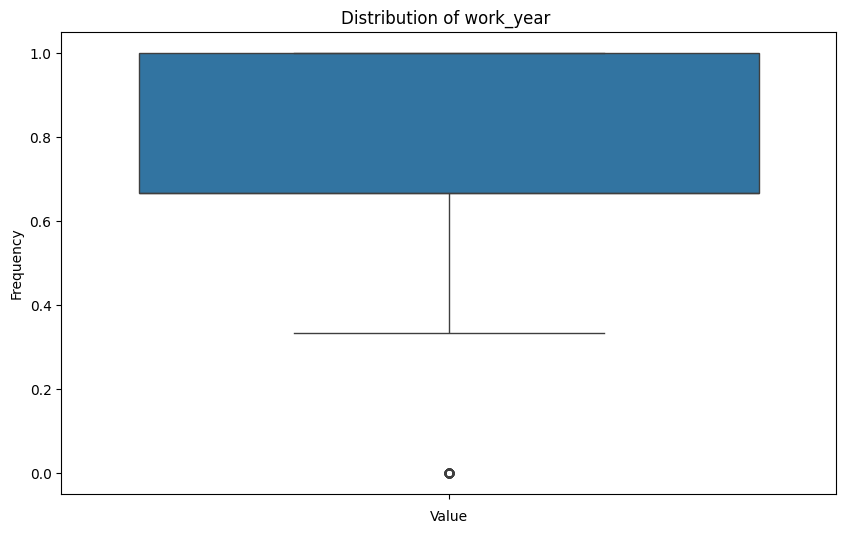

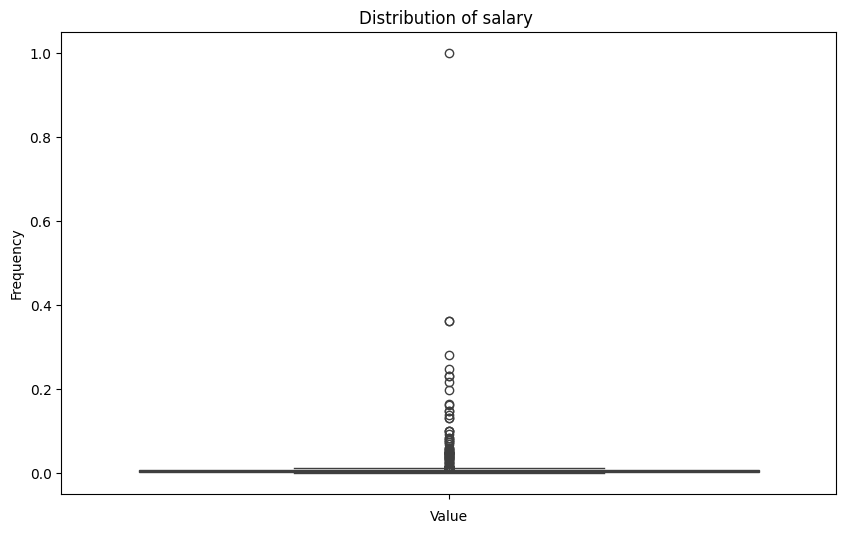

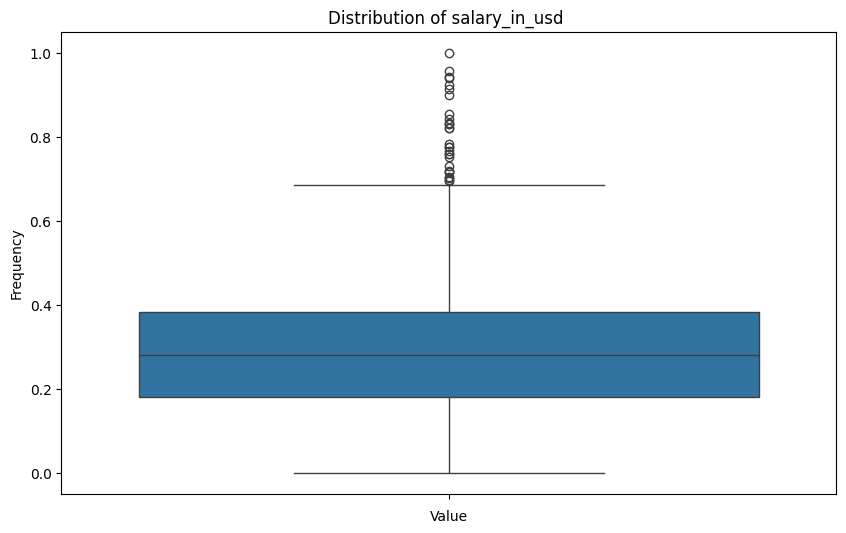

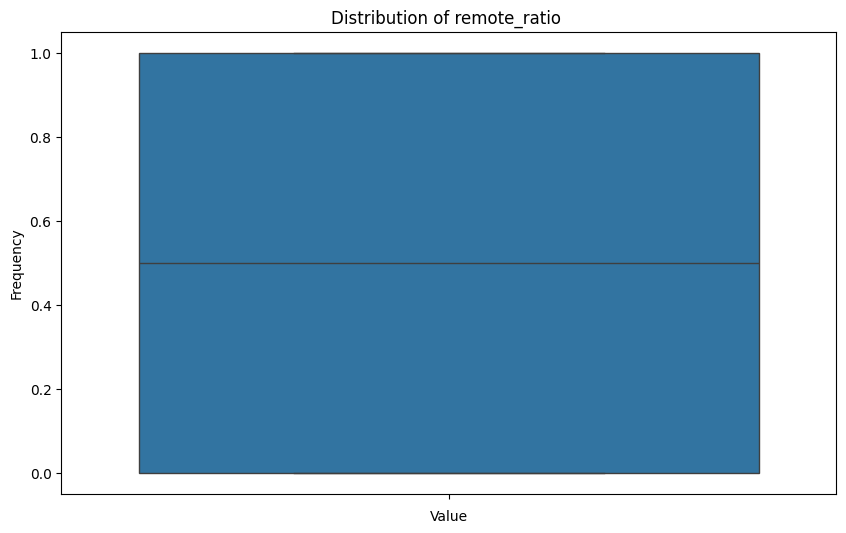

In [ ]:
for col in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(datascience[col])
  plt.title(f'Distribution of {col} ')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
# defining the Function
def detect_outliers(data,column):
  Q1 = datascience[column].quantile(0.25)
  Q3 = datascience[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = datascience[(datascience[column] < lower_bound) | (datascience[column] > upper_bound)]
  return outliers

# calling the function
outliers_salary = detect_outliers(datascience, 'salary')
outliers_work_year = detect_outliers(datascience, 'work_year')
outliers_salary_in_usd = detect_outliers(datascience, 'salary_in_usd')

# Printing the Outliers :
print("Salary Outliers:", outliers_salary.shape[0])
print("Work Year Outliers:", outliers_work_year.shape[0])
print("Salary in USD Outliers:", outliers_salary_in_usd.shape[0])



Salary Outliers: 95
Work Year Outliers: 75
Salary in USD Outliers: 29


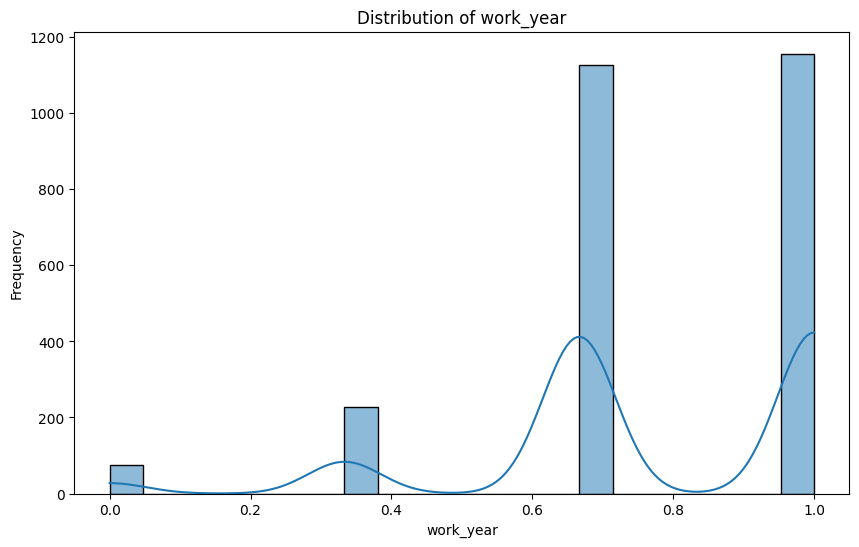

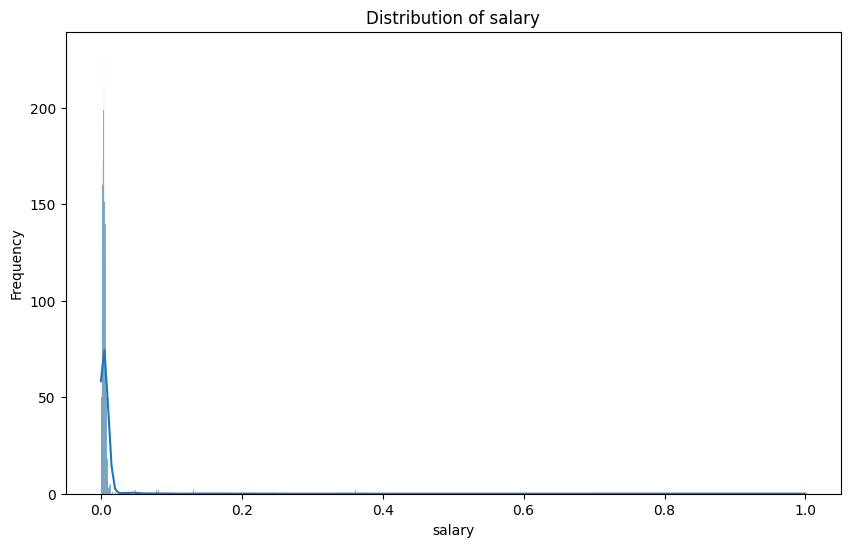

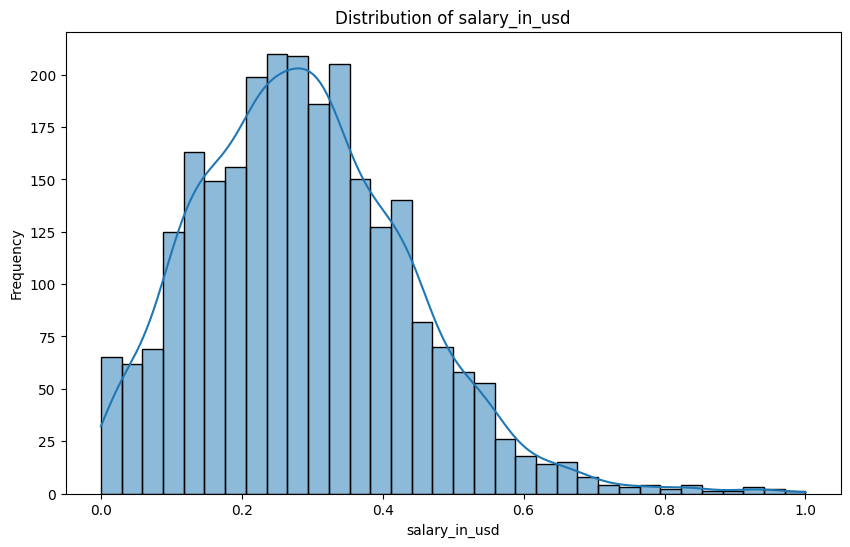

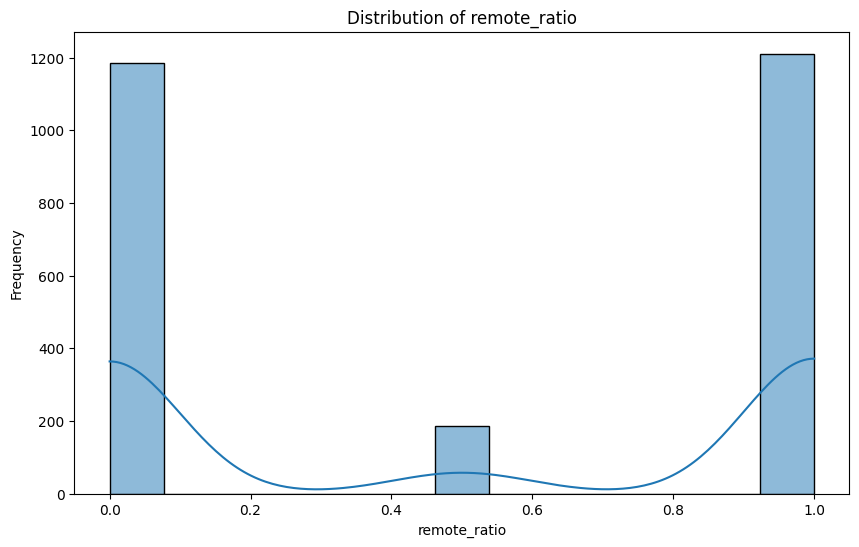

In [ ]:
for col in numerical_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(datascience[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

In [ ]:
# Scailing the numerical data

# Intializing the Standard Scaler :
scaler = MinMaxScaler()

datascience[numerical_columns] = scaler.fit_transform(datascience[numerical_columns])

In [ ]:
datascience.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1.0,0,0,0,0.002435,0,0.181436,0,1.0,0,0
1,1.0,1,1,1,0.000790,1,0.055900,1,1.0,1,1


In [ ]:
# Converting all the categorical columns into labels :
for col in datascience:
  if datascience[col].dtype == 'object':
    datascience[col] = pd.factorize(datascience[col])[0]

In [ ]:
features = ['work_year','experience_level','employment_type',
            'job_title','salary_currency','salary_in_usd',
            'remote_ratio','company_size','company_location',
           ]

X = datascience[features]
y = datascience['salary']

# **Recursive Feature Elimination**

Selected features by RFE :['work_year', 'employment_type', 'salary_currency', 'salary_in_usd', 'company_size']
Feature Importance:
            Feature  Importance
5     salary_in_usd    0.011442
4   salary_currency    0.004341
6      remote_ratio    0.000482
8  company_location    0.000302
3         job_title   -0.000016
1  experience_level   -0.000891
0         work_year   -0.001758
7      company_size   -0.003340
2   employment_type   -0.003560


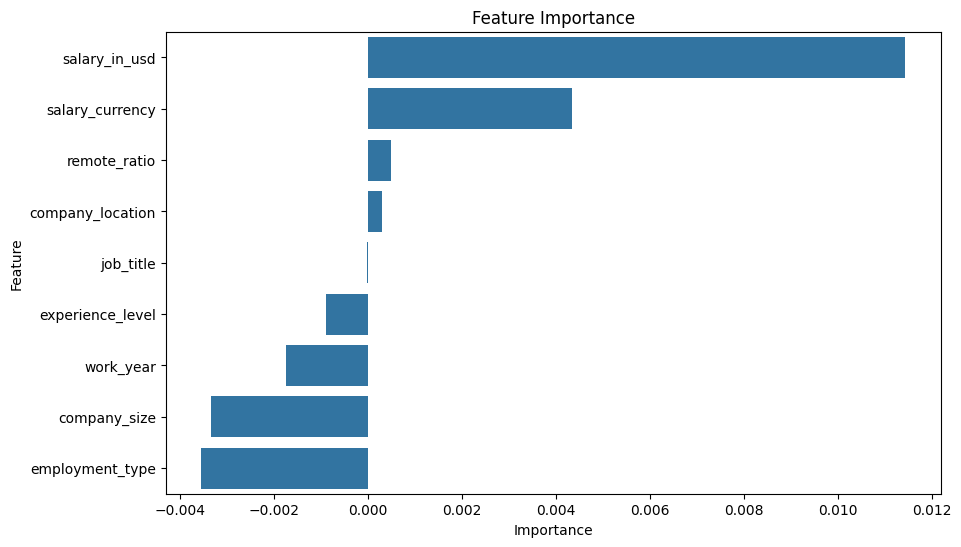

In [ ]:
# Recursive Feature Elimination : to get the utmost important feature
lr = LinearRegression()
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)


#Get the selected features:
selected_features = [feature for feature,selected in zip(features, rfe.support_)if selected ]
print(f"Selected features by RFE :{selected_features}")

# Fit the linear Regression model
lr.fit(X, y)

#
importances = pd.DataFrame({'Feature': features, 'Importance': lr.coef_})
importances = importances.sort_values('Importance', ascending=False)
print(f"Feature Importance:\n{importances}")


# Plotting the Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Correaltion Analysis :**

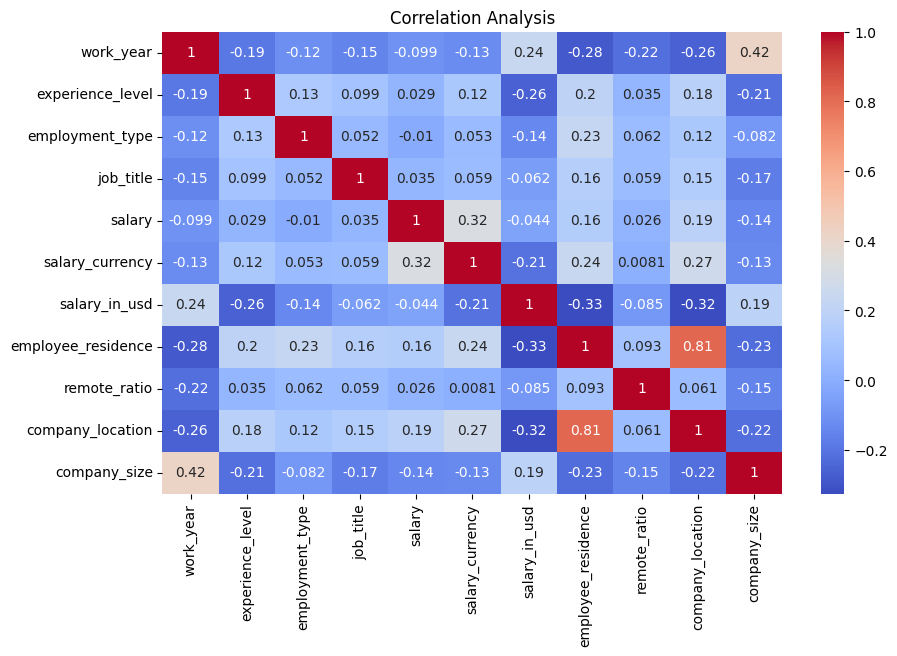

In [ ]:
correlation_matrix = datascience.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

# **Train-Test Split**

In [ ]:
# Spilting the data using Train Test Split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2067, 9)
X_test shape: (517, 9)


# **Linear Regression Model**

In [ ]:
# Intializing the Linear Regression Model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make prediction using Model
y_pred_lr = lr.predict(X_test)


# Evaluation using MSE and R2-Score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Printing the results
print(f"The Mean Squared Error : {mse_lr}")
print(f"The R2 Score : {r2_lr}")

The Mean Squared Error : 0.00026887024934166975
The R2 Score : 0.20733783599002653


# **RANDOM FOREST REGRESSOR :**

In [ ]:
# Intializing the Random Forest Classifier
rf = RandomForestRegressor(n_estimators=105, random_state=42)

# Fit the Model
rf.fit(X_train, y_train)

# Make prediction using Model
y_pred_rf = rf.predict(X_test)

# Evaluation using MSE and R2-Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing the Results
print(f"The Mean Squared Error : {mse_rf}")
print(f"The R2 Score : {r2_rf}")

The Mean Squared Error : 3.2027073441962835e-05
The R2 Score : 0.905580296058891


# **Hyper Parameter Tuning**



In [ ]:
# Hyper Parameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Intializing the Random Search for Hyper parameter Tuning:
rf = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(
                         estimator=rf,
                         param_distributions = param_grid,
                         n_iter=20,
                         random_state=42
            )

# Fit the Random Search Cv
random_search.fit(X_train,y_train)


# Get the best model from Random Search
best_model = random_search.best_estimator_

# Make prediction using best model By RandomSearchCV
y_pred_best = best_model.predict(X_test)

# Evaluation of Best Model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Printing the Results
print(f"The Mean Squared Error : {mse_best}")
print(f"The R2 Score : {r2_best}")


The Mean Squared Error : 4.1599017036539245e-05
The R2 Score : 0.8773610433076627


In [ ]:
# Save the pkl file for saving Hyper parameter tuning
with open('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)

In [ ]:
# Cross-Validation Score :

cv_score = cross_val_score(best_model,X_train,y_train,cv=5)
print(f"Cross Validation Score : {cv_score}")


# Evaluation on the test set:

mse_test = mean_squared_error(y_test, y_pred_best)
r2_test = r2_score(y_test, y_pred_best)

# Printing the Results
print(f"The Mean Squared Error on Test Set : {mse_test}")
print(f"The R2 Score on Test Set : {r2_test}")

Cross Validation Score : [0.63006311 0.22130751 0.33787496 0.45859725 0.02450174]
The Mean Squared Error on Test Set : 4.1599017036539245e-05
The R2 Score on Test Set : 0.8773610433076627


The scores vary significantly across folds.
Best score: 0.6301
Worst score: 0.0245 (very low)
The high variance suggests the model does not generalize well and may be overfitting on certain folds.